In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc51512392827fc1f5c785615689c51d


In [25]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

575

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
        #                  "Date": city_date})
   
   

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port augusta
Processing Record 2 of Set 1 | tukrah
Processing Record 3 of Set 1 | labuhan
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | aripuana
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | gravdal
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 1 | fort nelson
Processing Record 17 of Set 1 | san policarpo
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | korla
Processing Record 21 of Set 1 | jamesto

Processing Record 36 of Set 4 | lebu
Processing Record 37 of Set 4 | solano
Processing Record 38 of Set 4 | chipinge
Processing Record 39 of Set 4 | barawe
City not found. Skipping...
Processing Record 40 of Set 4 | mar del plata
Processing Record 41 of Set 4 | faanui
Processing Record 42 of Set 4 | san jose
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | plouzane
Processing Record 45 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 46 of Set 4 | puerto colombia
Processing Record 47 of Set 4 | san quintin
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | nishihara
Processing Record 50 of Set 4 | awbari
Processing Record 1 of Set 5 | kuche
City not found. Skipping...
Processing Record 2 of Set 5 | ketchikan
Processing Record 3 of Set 5 | neepawa
Processing Record 4 of Set 5 | ilulissat
Processing Record 5 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 6 of Set 5 | milkovo
Processing Record 7 of Set 5 | kah

Processing Record 21 of Set 8 | komsomolskiy
Processing Record 22 of Set 8 | kerewan
Processing Record 23 of Set 8 | manokwari
Processing Record 24 of Set 8 | bogotol
Processing Record 25 of Set 8 | saint-philippe
Processing Record 26 of Set 8 | ust-tsilma
Processing Record 27 of Set 8 | narasannapeta
Processing Record 28 of Set 8 | namie
Processing Record 29 of Set 8 | henties bay
Processing Record 30 of Set 8 | katsuura
Processing Record 31 of Set 8 | paraiso
Processing Record 32 of Set 8 | wanaka
Processing Record 33 of Set 8 | tilichiki
Processing Record 34 of Set 8 | namatanai
Processing Record 35 of Set 8 | lakselv
Processing Record 36 of Set 8 | muleba
Processing Record 37 of Set 8 | navapur
City not found. Skipping...
Processing Record 38 of Set 8 | aklavik
Processing Record 39 of Set 8 | westport
Processing Record 40 of Set 8 | astakos
Processing Record 41 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 42 of Set 8 | constitucion
Processing Record 43 of Set

City not found. Skipping...
Processing Record 8 of Set 12 | mount isa
Processing Record 9 of Set 12 | pimentel
Processing Record 10 of Set 12 | puerto escondido
Processing Record 11 of Set 12 | camopi
Processing Record 12 of Set 12 | bonthe
Processing Record 13 of Set 12 | schieder-schwalenberg
Processing Record 14 of Set 12 | sharjah
Processing Record 15 of Set 12 | abu kamal
Processing Record 16 of Set 12 | simbahan
Processing Record 17 of Set 12 | hambantota
Processing Record 18 of Set 12 | hailey
Processing Record 19 of Set 12 | mitsamiouli
Processing Record 20 of Set 12 | teruel
Processing Record 21 of Set 12 | gizo
Processing Record 22 of Set 12 | leninsk
Processing Record 23 of Set 12 | lodingen
Processing Record 24 of Set 12 | ambilobe
Processing Record 25 of Set 12 | comodoro rivadavia
-----------------------------
Data Retrieval Complete      
-----------------------------


In [27]:
len(city_data)


518

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Port Augusta,-32.5000,137.7667,59.70,46,9,15.30,AU
1,Tukrah,32.5341,20.5791,77.97,72,0,10.31,LY
2,Labuhan,-6.8844,112.2051,77.97,69,4,6.13,ID
3,Pisco,-13.7000,-76.2167,62.65,77,0,8.05,PE
4,Aripuana,-9.1667,-60.6333,77.14,50,5,1.77,BR
5,Punta Arenas,-53.1500,-70.9167,33.91,93,0,16.11,CL
6,Albany,42.6001,-73.9662,73.36,93,0,4.05,US
7,Rikitea,-23.1203,-134.9692,71.33,73,17,5.64,PF
8,San Patricio,28.0170,-97.5169,86.72,66,3,10.49,US
9,Gravdal,68.1214,13.5031,53.56,90,100,4.76,NO


In [33]:
new_column_order = ["City", "Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Augusta,AU,-32.5000,137.7667,59.70,46,9,15.30
1,Tukrah,LY,32.5341,20.5791,77.97,72,0,10.31
2,Labuhan,ID,-6.8844,112.2051,77.97,69,4,6.13
3,Pisco,PE,-13.7000,-76.2167,62.65,77,0,8.05
4,Aripuana,BR,-9.1667,-60.6333,77.14,50,5,1.77
5,Punta Arenas,CL,-53.1500,-70.9167,33.91,93,0,16.11
6,Albany,US,42.6001,-73.9662,73.36,93,0,4.05
7,Rikitea,PF,-23.1203,-134.9692,71.33,73,17,5.64
8,San Patricio,US,28.0170,-97.5169,86.72,66,3,10.49
9,Gravdal,NO,68.1214,13.5031,53.56,90,100,4.76


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

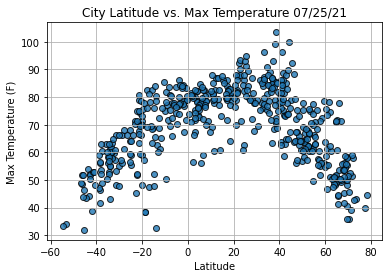

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

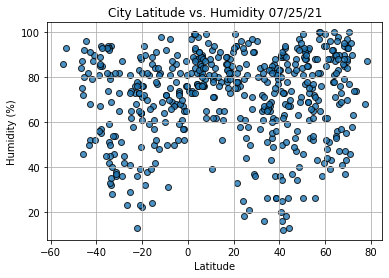

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

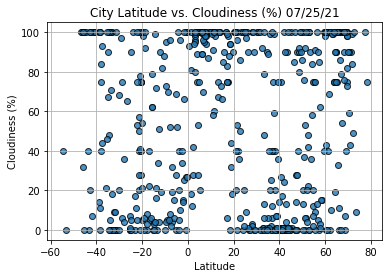

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

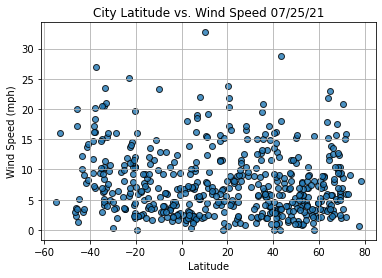

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()